# Santa Clara Election Data Code

In [ ]:
#Cell 1: Import all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load Data Into Program

In [ ]:
# Cell 2: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define the Google Sheets URL as a CSV export link
url = "https://docs.google.com/spreadsheets/d/1wwHaCiBFcl1i_7qYCOmjBsTvSpnF-AUOofohya7-_GE/export?format=csv"

# Read the data from the Google Sheet into a pandas DataFrame
data = pd.read_csv(url)

MessageError: ignored

Define the function to generate bar plots


In [ ]:
# Define a function to plot data based on column prefix and title
def plot_data(column_prefix, title):
    # Get all columns that start with the given column prefix
    columns = [col for col in data.columns if col.startswith(column_prefix)]

    # Melt the data to transform it into a long format
    melted_data = pd.melt(data, id_vars=['Voted For Rishi', 'Voted For Anna'], value_vars=columns)

    # Create a figure with two subplots
    fig, ax = plt.subplots(2, 1, figsize=(15, 10))

    # Plot the first subplot: Bar plot for voting for Rishi Kumar
    sns.barplot(x='value', y='variable', hue='Voted For Rishi', data=melted_data, ax=ax[0], ci=None)

    # Plot the second subplot: Bar plot for voting for Anna Eshoo
    sns.barplot(x='value', y='variable', hue='Voted For Anna', data=melted_data, ax=ax[1], ci=None)

    # Set titles for the subplots
    ax[0].set_title(f'Voting for Rishi Kumar by {title}')
    ax[1].set_title(f'Voting for Anna Eshoo by {title}')

    # Set labels for the x-axis and remove y-axis labels
    for axes in ax:
        axes.set_xlabel('% Population')
        axes.set_ylabel('')

    # Adjust the layout of subplots to prevent overlapping
    plt.tight_layout()

Print Bar Plots
- Although graph prints data for those under 18 who cannot vote, however data is useful to see how families with children/minors are voting.

<ipython-input-4-00fbcdb610be>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='value', y='variable', hue='Voted For Rishi', data=melted_data, ax=ax[0], ci=None)
<ipython-input-4-00fbcdb610be>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='value', y='variable', hue='Voted For Anna', data=melted_data, ax=ax[1], ci=None)
<ipython-input-4-00fbcdb610be>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='value', y='variable', hue='Voted For Rishi', data=melted_data, ax=ax[0], ci=None)
<ipython-input-4-00fbcdb610be>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='value', y='variable', hue='Voted For Anna', data=melted_data, ax=ax[1], ci=None)
<ipython-input-4-00fbcdb610be>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `err

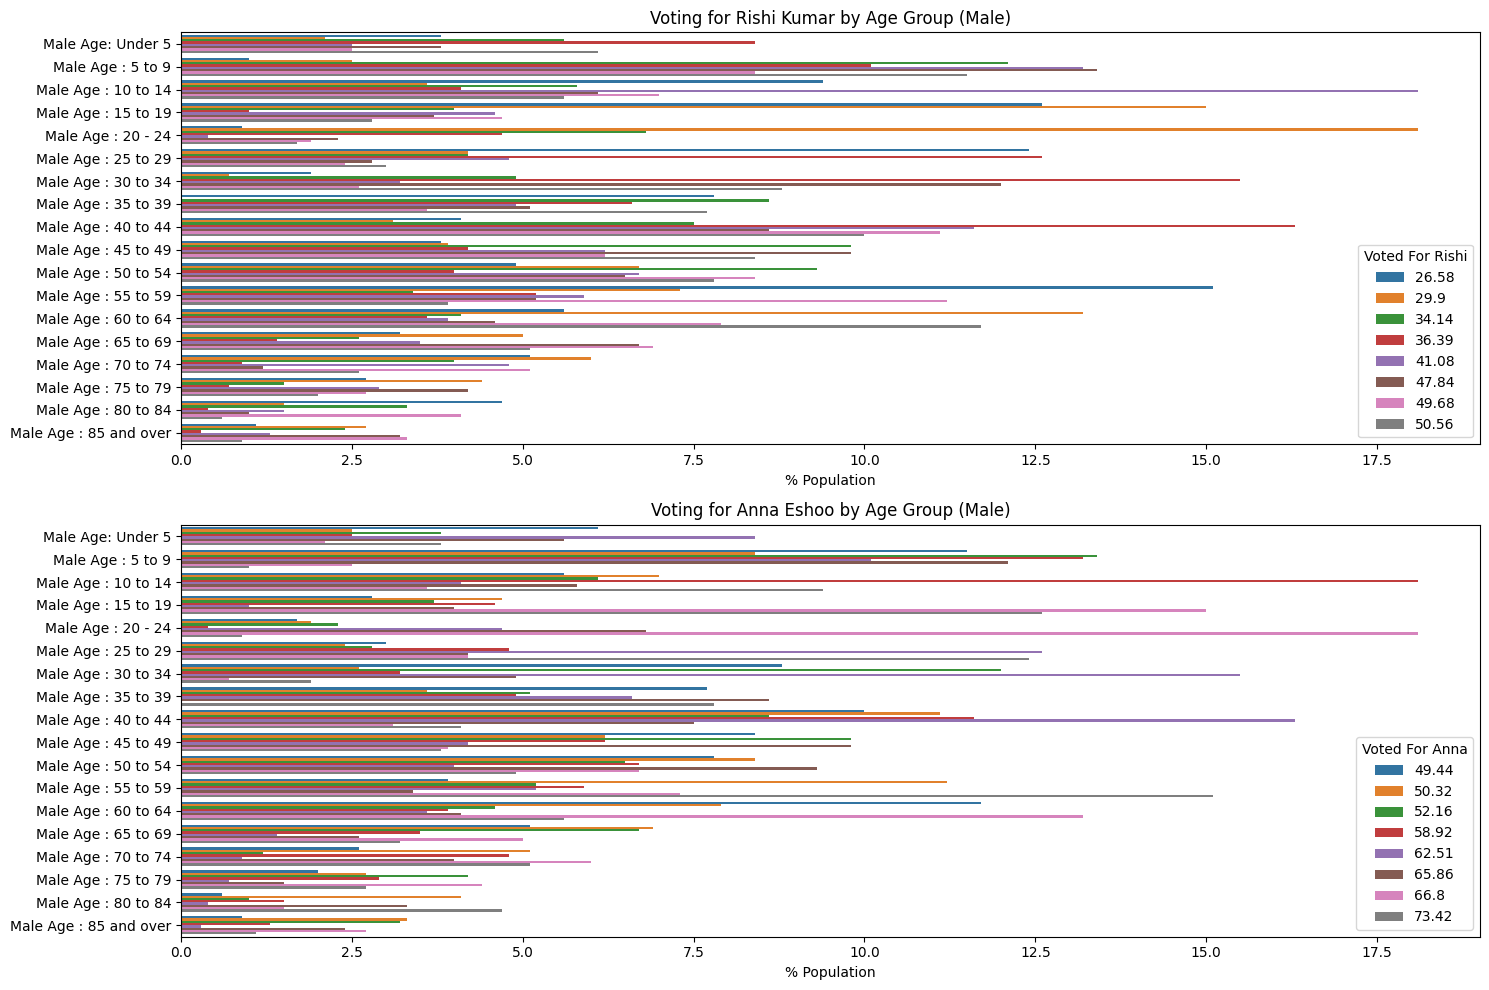

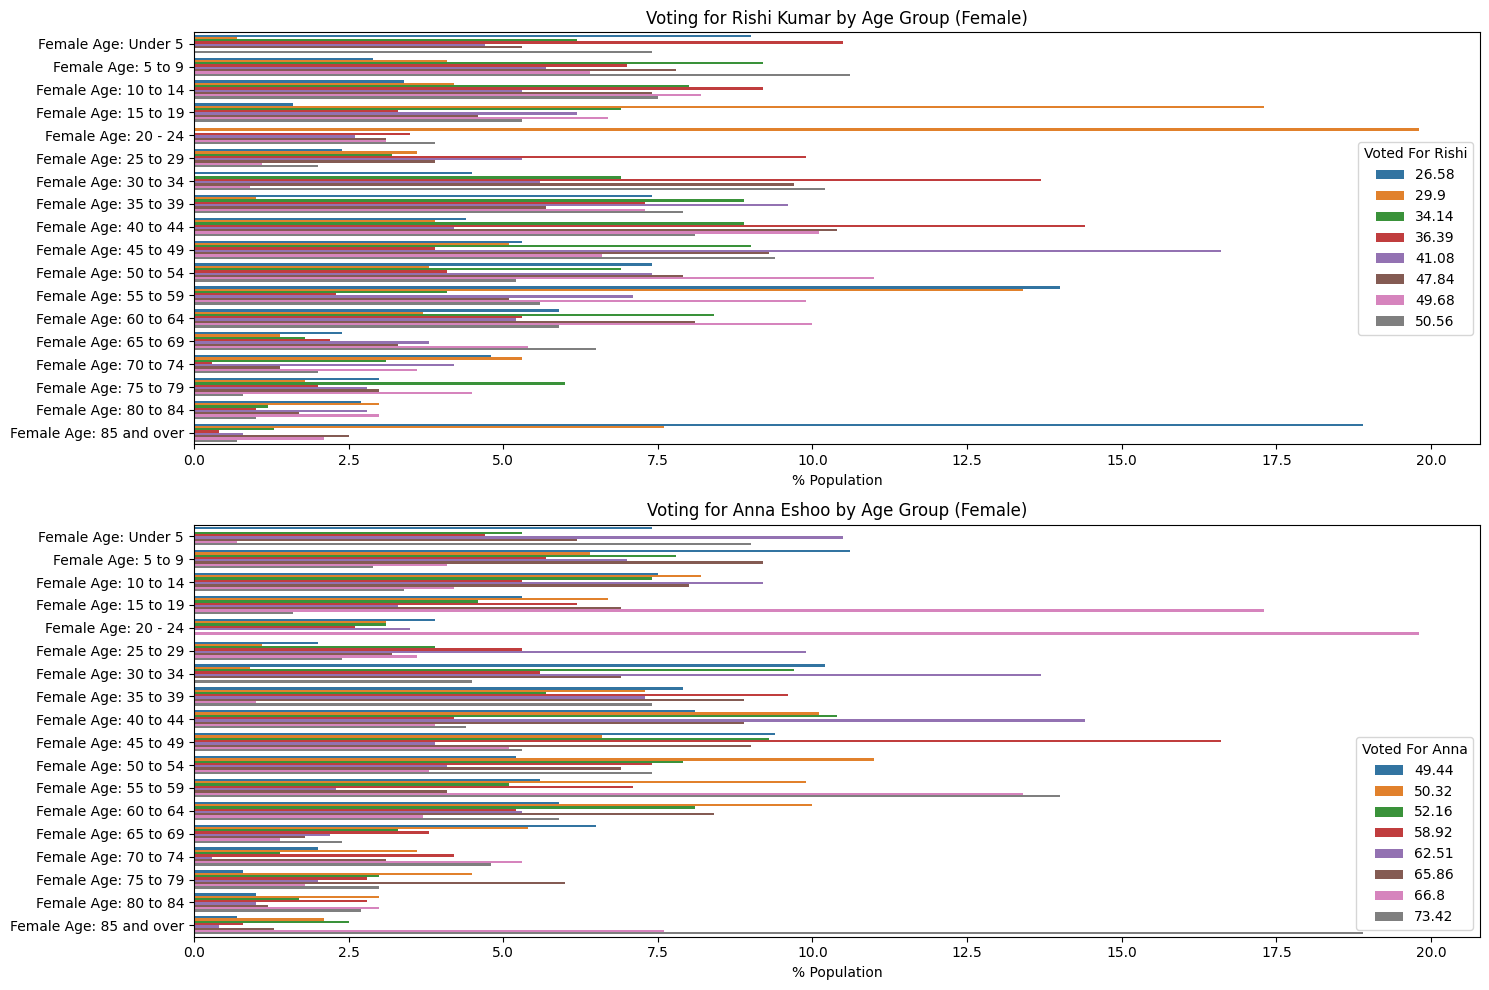

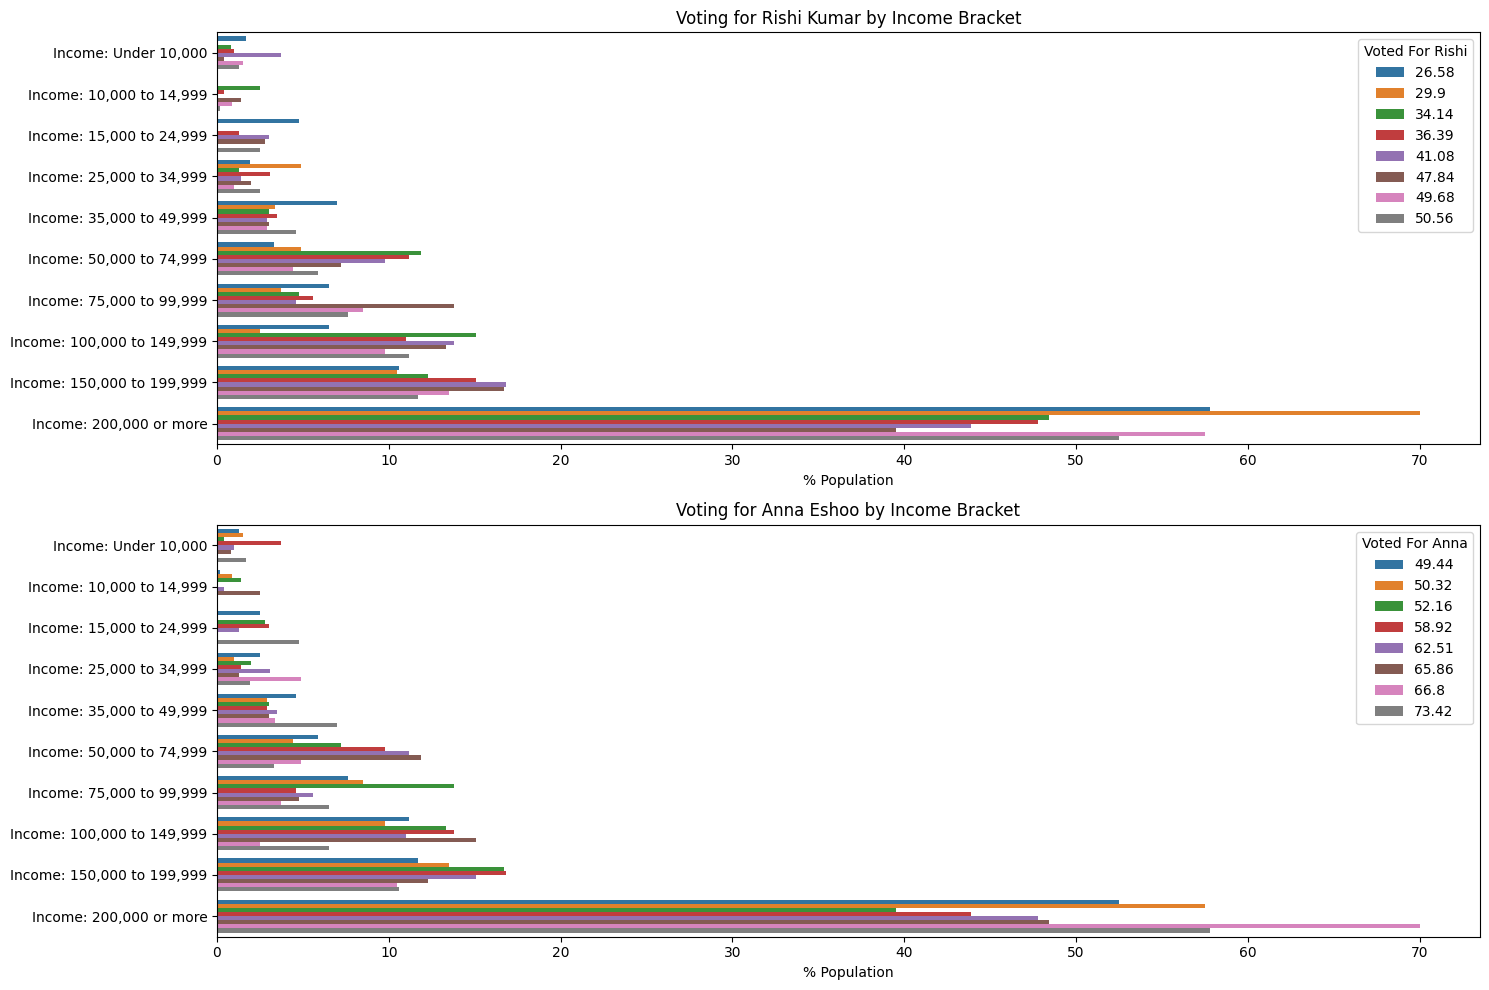

In [ ]:
plot_data('Male Age', 'Age Group (Male)')
plot_data('Female Age', 'Age Group (Female)')
plot_data('Income', 'Income Bracket')

Calculate data and print the correlation

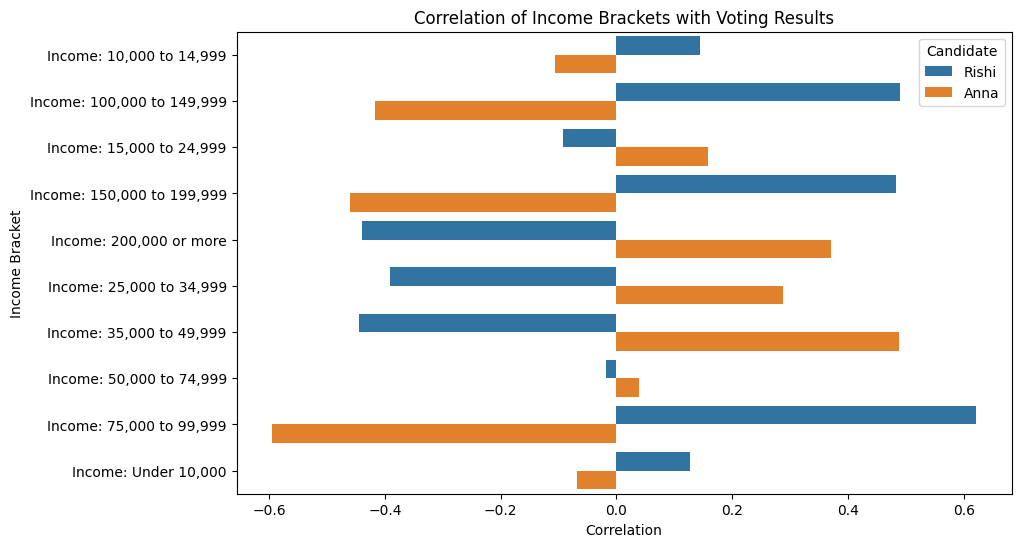

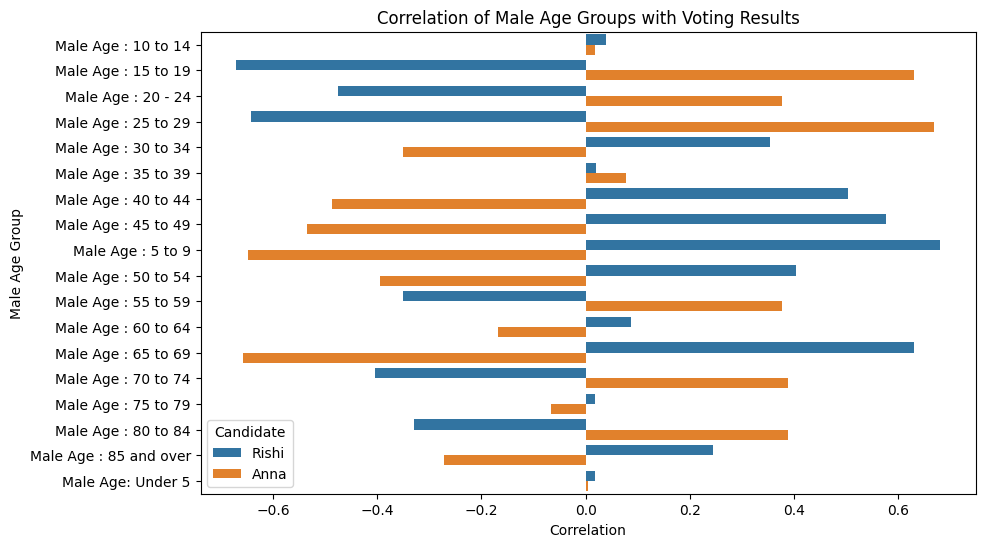

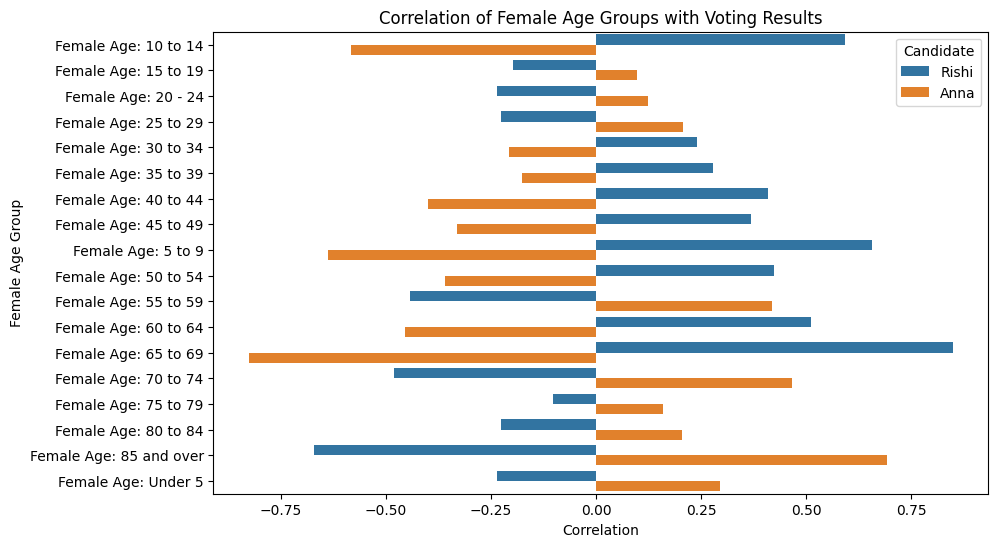

In [ ]:
correlation_rishi = data.drop(columns='Voted For Anna').corr()['Voted For Rishi'].sort_values(ascending=False)
correlation_anna = data.drop(columns='Voted For Rishi').corr()['Voted For Anna'].sort_values(ascending=False)

pd.DataFrame({'Rishi': correlation_rishi, 'Anna': correlation_anna})



#Coefficient Plot For Income
# Extract income correlations
income_corr = pd.DataFrame({'Rishi': correlation_rishi.filter(like='Income'),
                            'Anna': correlation_anna.filter(like='Income')})

# Reset index
income_corr = income_corr.reset_index().rename(columns={'index': 'Income Bracket'})

# Melt the dataframe to make it suitable for seaborn
income_corr_melted = pd.melt(income_corr, id_vars='Income Bracket', var_name='Candidate', value_name='Correlation')

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Correlation', y='Income Bracket', hue='Candidate', data=income_corr_melted)
plt.title('Correlation of Income Brackets with Voting Results')
plt.show()

#Coefficient plot for Males

# Extract male age correlations
male_age_corr = pd.DataFrame({'Rishi': correlation_rishi.filter(like='Male Age'),
                              'Anna': correlation_anna.filter(like='Male Age')})

# Reset index
male_age_corr = male_age_corr.reset_index().rename(columns={'index': 'Male Age Group'})

# Melt the dataframe to make it suitable for seaborn
male_age_corr_melted = pd.melt(male_age_corr, id_vars='Male Age Group', var_name='Candidate', value_name='Correlation')

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Correlation', y='Male Age Group', hue='Candidate', data=male_age_corr_melted)
plt.title('Correlation of Male Age Groups with Voting Results')
plt.show()

#Coefficient plot for Females
# Extract female age correlations
female_age_corr = pd.DataFrame({'Rishi': correlation_rishi.filter(like='Female Age'),
                                'Anna': correlation_anna.filter(like='Female Age')})

# Reset index
female_age_corr = female_age_corr.reset_index().rename(columns={'index': 'Female Age Group'})

# Melt the dataframe to make it suitable for seaborn
female_age_corr_melted = pd.melt(female_age_corr, id_vars='Female Age Group', var_name='Candidate', value_name='Correlation')

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Correlation', y='Female Age Group', hue='Candidate', data=female_age_corr_melted)
plt.title('Correlation of Female Age Groups with Voting Results')
plt.show()

Print Graph that shows Voting by Income based on sample:

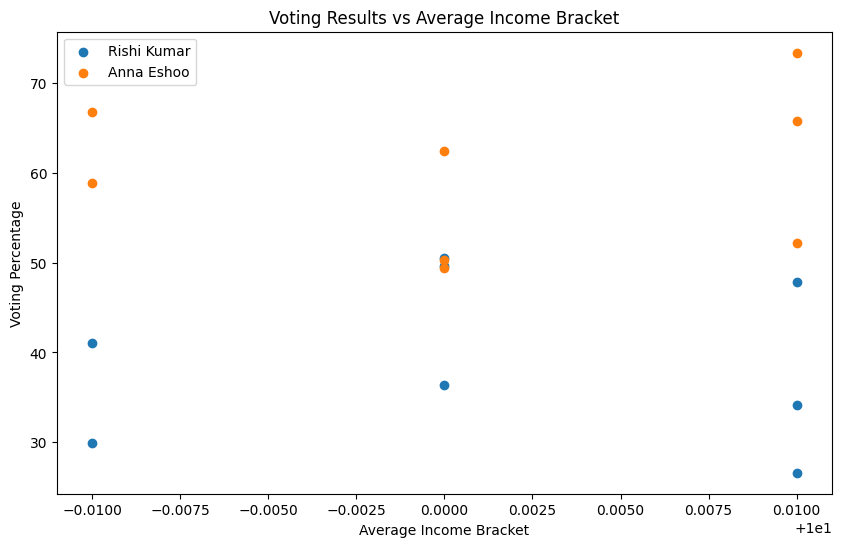

In [ ]:
# Calculate the average income bracket for each precinct
data['Average Income Bracket'] = data[[col for col in data.columns if 'Income' in col]].mean(axis=1)

# Plot the average income bracket against the voting results
plt.figure(figsize=(10, 6))
plt.scatter(data['Average Income Bracket'], data['Voted For Rishi'], label='Rishi Kumar')
plt.scatter(data['Average Income Bracket'], data['Voted For Anna'], label='Anna Eshoo')

# Set the title and labels
plt.title('Voting Results vs Average Income Bracket')
plt.xlabel('Average Income Bracket')
plt.ylabel('Voting Percentage')
plt.legend()

# Show the plot
plt.show()


Print Graph to show voting by age, filtered by census data 20 and above to print only ages of voting groups

In [ ]:
# Calculate the total number of votes for each age group
age_cols = [col for col in data.columns if 'Age' in col]
age_votes = data[age_cols + ['Voted For Rishi', 'Voted For Anna']].melt(id_vars=['Voted For Rishi', 'Voted For Anna'], value_vars=age_cols)

# Group by age group and calculate the average percentage of votes
age_votes_grouped = age_votes.groupby('variable').mean()

# Sort by the difference in votes and display the top 10 age groups
age_votes_grouped['Vote Difference'] = age_votes_grouped['Voted For Anna'] - age_votes_grouped['Voted For Rishi']
age_votes_grouped.sort_values('Vote Difference', ascending=False)

,Voted For Rishi,Voted For Anna,value,Vote Difference
variable,,,,
Female Age: 10 to 14,39.52125,59.92875,6.6500,20.4075
Female Age: 15 to 19,39.52125,59.92875,6.4875,20.4075
Male Age : 20 - 24,39.52125,59.92875,4.6000,20.4075
Male Age : 25 to 29,39.52125,59.92875,5.8000,20.4075
Male Age : 30 to 34,39.52125,59.92875,6.2000,20.4075
Male Age : 35 to 39,39.52125,59.92875,5.5375,20.4075
Male Age : 40 to 44,39.52125,59.92875,9.0375,20.4075
Male Age : 45 to 49,39.52125,59.92875,6.5375,20.4075
Male Age : 5 to 9,39.52125,59.92875,9.0250,20.4075


import numpy as np
from google.colab import autoviz
df_5413296064408622854 = autoviz.get_registered_df('df_5413296064408622854')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5413296064408622854, *['value'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5413296064408622854 = autoviz.get_registered_df('df_5413296064408622854')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5413296064408622854, *['value'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5413296064408622854 = autoviz.get_registered_df('df_5413296064408622854')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5413296064408622854, *['value'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5413296064408622854 = autoviz.get_registered_df('df_5413296064408622854')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5413296064408622854, *['value'], **{})
chart

# Helper Code Used for this project

How I calculated the counties I wanted to add to this list

In [ ]:
# # Load the voting data spreadsheet
# xlsx = pd.ExcelFile('/content/drive/MyDrive/SantaClaraData/detail.xlsx')

# # Load the fifth sheet of the excel file into a data frame
# df = xlsx.parse(4)

# # The first two rows are headers. Let's combine them to get a better understanding of the data.
# new_header = df.iloc[1]  #grab the first row for the header
# df = df[2:]  #take the data less the header row
# df.columns = new_header  #set the header row as the df header

# # Convert 'Total' column to numeric
# df['Total'] = pd.to_numeric(df['Total'], errors='coerce')

# # Sort by 'Total' votes and get the top 20 counties
# top_20_counties = df.sort_values(by='Total', ascending=False).head(20)

# top_20_counties[['County', 'Total']]

More filters, this is how I Also made sure to add counties with data in which Rishi had Majority Vote to make sure I have data from both sides

In [ ]:
# # Load the spreadsheet
# xlsx = pd.ExcelFile('/content/drive/MyDrive/SantaClaraData/detail.xlsx')

# # Load the fifth sheet of the excel file into a data frame
# df = xlsx.parse(4)

# # The first two rows are headers. Let's combine them to get a better understanding of the data.
# new_header = df.iloc[1]  #grab the first row for the header
# df = df[2:]  #take the data less the header row
# df.columns = new_header  #set the header row as the df header

# # Convert necessary columns to numeric
# df['Registered Voters'] = pd.to_numeric(df['Registered Voters'], errors='coerce')
# df['Total Votes (Anna)'] = pd.to_numeric(df['Total Votes'].iloc[:, 0], errors='coerce')
# df['Total Votes (Rishi)'] = pd.to_numeric(df['Total Votes'].iloc[:, 1], errors='coerce')

# # Filter rows where Anna or Rishi had more votes than the other
# df_anna_wins = df[df['Total Votes (Anna)'] > df['Total Votes (Rishi)']]
# df_rishi_wins = df[df['Total Votes (Rishi)'] > df['Total Votes (Anna)']]

# # Sort by registered voters (as a proxy for population)
# df_anna_wins_sorted = df_anna_wins.sort_values(by='Registered Voters', ascending=False)
# df_rishi_wins_sorted = df_rishi_wins.sort_values(by='Registered Voters', ascending=False)

# # Get the top 10 counties
# top_10_counties_anna = df_anna_wins_sorted[['County', 'Registered Voters']].head(10)
# top_10_counties_rishi = df_rishi_wins_sorted[['County', 'Registered Voters']].head(10)

# top_10_counties_anna, top_10_counties_rishi

The Website I used to interpret data to navigate census data and county blocks : https://datacommons.org/browser/geoId/

#How To Solve Mapping Problem

The following is how I would solve the problem that I would need a mapping from Census Block Group to precinct. Note that there are often more than one Census Block Group in one precinct. This is how I solve the problem that a precinct doesn't fit nicely in a Census Block Group is part of the assignment. However for this assignment I created a sample data spreadsheet and did something similar manually

In [ ]:
# import geopandas as gpd
# import pandas as pd

# # Loading shapefiles into GeoDataFrames
# precincts = gpd.read_file('precincts.shp')
# census_blocks = gpd.read_file('census_block_groups.shp')

# # Ensuring both GeoDataFrames use the same coordinate reference system
# precincts = precincts.to_crs(census_blocks.crs)

# # Perform an intersection to get overlapping areas and keep associated data
# intersections = gpd.overlay(census_blocks, precincts, how='intersection')

# # Calculating area of intersections
# intersections['overlap_area'] = intersections.area

# # Merging the intersections back to the original census block data to get total area
# intersections = intersections.merge(census_blocks[['census_block_id', 'geometry']], on='census_block_id', suffixes=('_intersection', '_original'))
# intersections['original_area'] = intersections['geometry_original'].area

# # Calculate the proportion of the original area that each intersection represents
# intersections['proportion'] = intersections['overlap_area'] / intersections['original_area']

# # Group by precinct and census block, summing proportions within each group
# proportional_mapping = intersections.groupby(['precinct_id', 'census_block_id'])['proportion'].sum().reset_index()

# # Creating the final mapping dictionary with precincts as keys and dictionaries of (block, proportion) pairs as values
# mapping_dict = {}
# for precinct, block, proportion in proportional_mapping.itertuples(index=False):
#     if precinct not in mapping_dict:
#         mapping_dict[precinct] = {}
#     mapping_dict[precinct][block] = proportion

# # Now I have my mapping dictionary ready!
# print(mapping_dict)


Summary of what code above does:

Loading and Preprocessing Data: This Python script first loads in the two necessary shapefiles, one for precincts and one for census block groups. It then makes sure they both use the same coordinate reference system, which is essential for accurate spatial analysis.

Performing Intersection Operation: Next, the script performs an intersection operation between the two shapefiles. This operation identifies all areas where a census block group and precinct overlap. The result is a new GeoDataFrame that only contains these overlapping areas.

Calculating Overlap Proportions: After the intersection, the script calculates the area of each overlapping section. Then it merges this data back to the original census block groups data to calculate the proportion of the original census block that each intersection represents. This is done by dividing the overlapping area by the total area of the census block group.

Aggregating Overlaps by Precinct and Census Block Group: The script then groups the data by both precinct and census block group. Within each group, it sums up the proportions of overlap. This gives the total proportion of each census block group that falls within each precinct.

Creating Final Mapping: Finally, the script creates a dictionary where the keys are the precinct IDs and the values are dictionaries. Each value dictionary has census block group IDs as keys and the proportional overlap with the corresponding precinct as values. This structure allows for easy lookup of the proportion of any census block group that falls within any precinct.

#Analysis Of what Rishi Kumar Could Do

> Given the data correlations, I believe Rishi Kumar should broaden his appeal to more demographics while consolidating his base. He is already resonating with middle-aged men and women, and those in lower income brackets, so he should continue addressing their concerns. To reach out to those groups where Anna Eshoo has a better correlation, he should consider targeted strategies. For instance, appealing to younger men and women could involve addressing issues like student loan debt, affordable housing, and climate change, which are often important to this demographic. He should consider hosting town halls or forums at local universities and use social media platforms to reach this group effectively. For households with minors, focus on education and family-friendly policies might resonate well. Finally, for older women and higher income brackets, he should articulate his stance on healthcare, social security, tax policies, and discuss how his policies will benefit them. It is essential that Rishi presents a clear contrast between himself and Anna Eshoo, outlining why his policies and approaches would be more beneficial for these groups.





